# Import libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Import data

In [2]:
dataset = pd.read_csv('avocado.csv')
dataset.shape

(18249, 14)

In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


In [4]:
dataset.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


## Drop the first colum "Unnamed"

In [5]:
dataset.drop('Unnamed: 0', axis=1, inplace=True)
dataset.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


# Exploratory analysis

Scatter plot

The correlation matrix:


Text(0.5, 1.0, 'Average price')

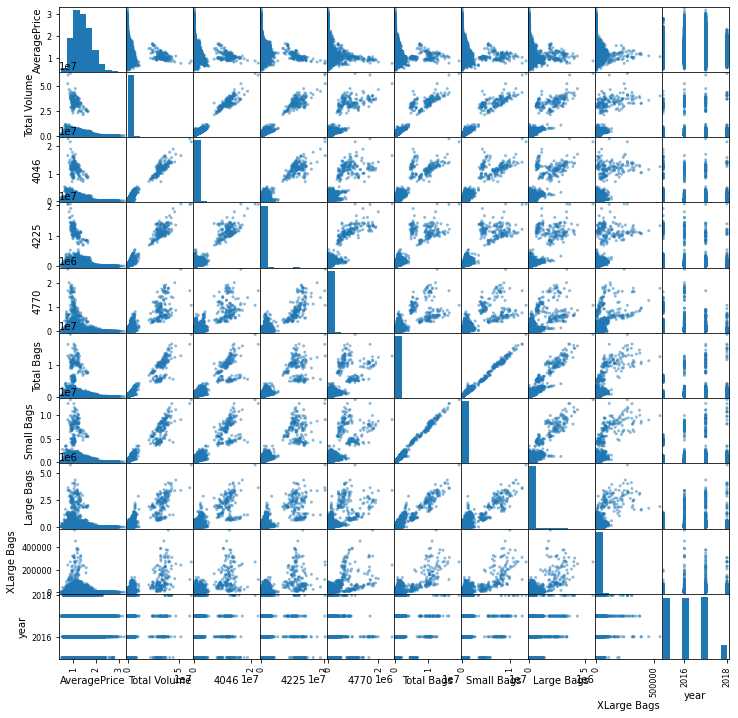

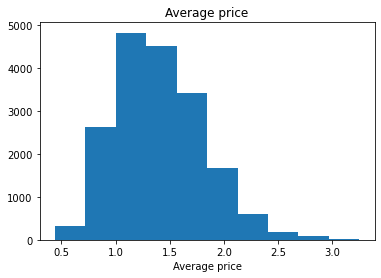

In [6]:
# Scatter plot of the data
from pandas.plotting import scatter_matrix

scatter_matrix(dataset,figsize = (12,12))
print('The correlation matrix:')
corr_mtx = dataset.corr()
corr_mtx.round(2)

plt.figure()
dataset_array = dataset.to_numpy()
price = dataset_array[:,1]
plt.hist(price)
plt.xlabel('Average price')
plt.title('Average price')

In [7]:
corr_mtx['AveragePrice'].abs().sort_values(ascending = False)

AveragePrice    1.000000
4046            0.208317
Total Volume    0.192752
4770            0.179446
Total Bags      0.177088
Small Bags      0.174730
Large Bags      0.172940
4225            0.172928
XLarge Bags     0.117592
year            0.093197
Name: AveragePrice, dtype: float64

Averaged Price plot by Date

Text(0.5, 1.0, 'AveragePrice')

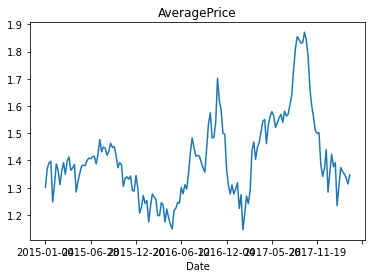

In [8]:
byDate = dataset.groupby('Date').mean()
byDate['AveragePrice'].plot()
plt.title('AveragePrice')
# I noticed your plot shows the month in 'Jan' and 'Jul'. I don't know how to do that so 
# I left it like this

Plot by year

<AxesSubplot:xlabel='year'>

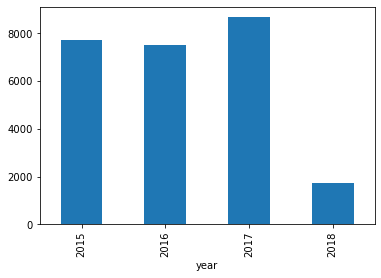

In [9]:
dataset.groupby([dataset.year])['AveragePrice'].sum().plot.bar()

Plot by region

Text(0.5, 1.0, 'Average Price According to Region')

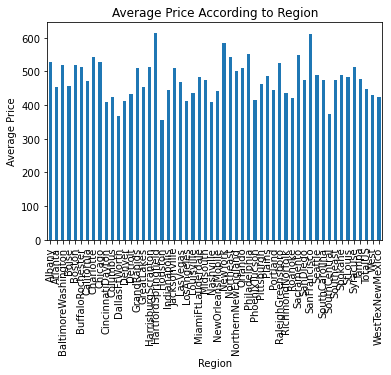

In [10]:
dataset.groupby([dataset.region])['AveragePrice'].sum().plot.bar()
plt.xlabel('Region')
plt.ylabel('Average Price')
plt.title('Average Price According to Region')

Plot by region in descending senquence

Text(0.5, 1.0, 'Average Price According to Region')

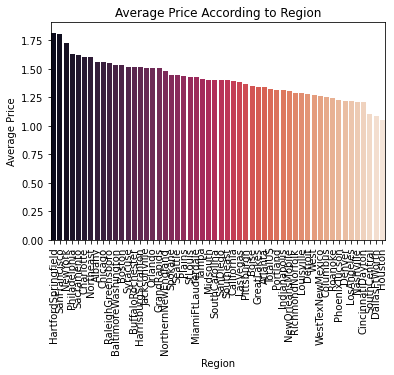

In [11]:
byRegion=dataset.groupby('region').mean()
byRegion.sort_values(by=['AveragePrice'], ascending=False, inplace=True)
# plt.figure(figsize=(17,8),dpi=250)
sns.barplot(x = byRegion.index,y=byRegion["AveragePrice"],data = byRegion,palette='rocket')
plt.xticks(rotation=90)
plt.xlabel('Region')
plt.ylabel('Average Price')
plt.title('Average Price According to Region')

Plot of average price distribution

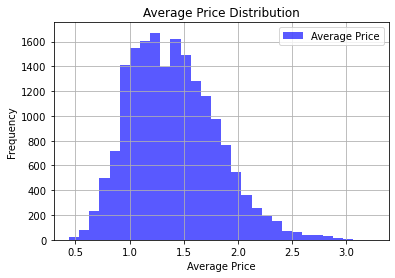

In [12]:
dataset["AveragePrice"].plot(kind="hist",color="blue",bins=30,grid=True,alpha=0.65,label="Average Price")
plt.legend()
plt.xlabel("Average Price")
plt.title("Average Price Distribution")
plt.show()

Factor plot

/Users/ray/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/Users/ray/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


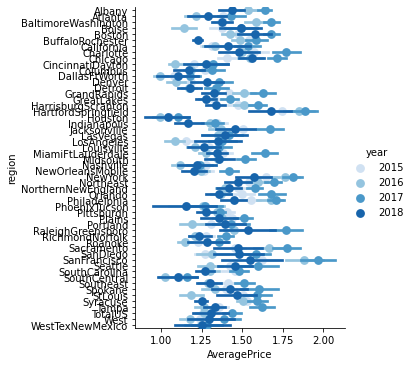

In [13]:
g = sns.factorplot('AveragePrice','region',data=dataset,
                   hue='year',
#                    size=18,
#                    aspect=0.7,
                   palette='Blues',
                   join=False,
              )

Heat map

<AxesSubplot:>

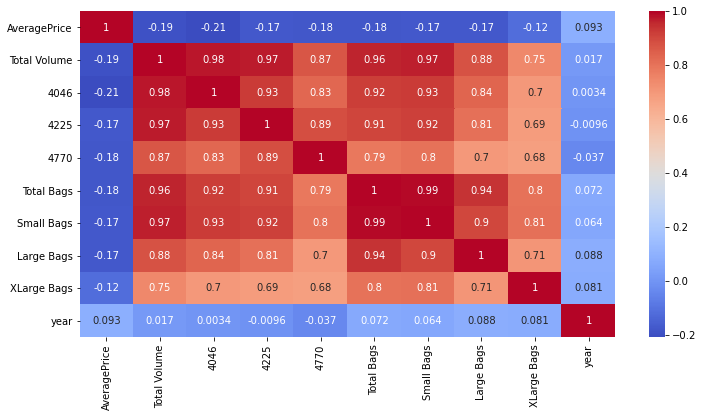

In [14]:
plt.figure(figsize=(12,6))
sns.heatmap(dataset.corr(),cmap='coolwarm',annot=True)

# Preprocessing data

In [15]:
dataset.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


## Split the Date into Month and Day

In [16]:
dataset['Date'] = pd.to_datetime(dataset['Date'])
dataset['Month'] = dataset['Date'].apply(lambda x:x.month)
dataset['Day'] = dataset['Date'].apply(lambda x:x.day)

Plot of averaged price per month

Text(0.5, 1.0, 'Average Price Per Month')

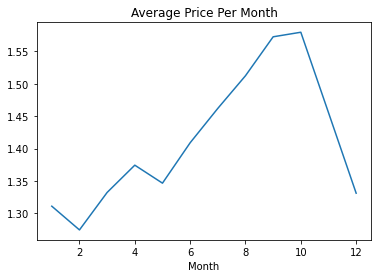

In [17]:
byMonth = dataset.groupby('Month').mean()

byMonth['AveragePrice'].plot()

plt.title('Average Price Per Month')


Plot of averaged price per day

Text(0.5, 1.0, 'Average Price Per Day')

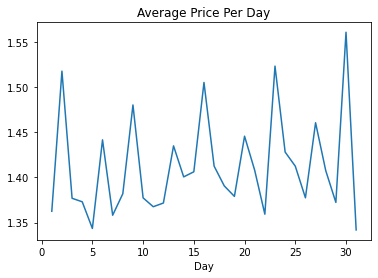

In [18]:
byDay = dataset.groupby('Day').mean()
byDay['AveragePrice'].plot()
plt.title('Average Price Per Day')

## Drop the 'Date' column 

In [19]:
dataset.drop('Date', axis=1, inplace=True)
dataset.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,12,27
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,12,20
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,12,13
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,12,6
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,11,29


Plot of average price over month

<AxesSubplot:xlabel='Month', ylabel='AveragePrice'>

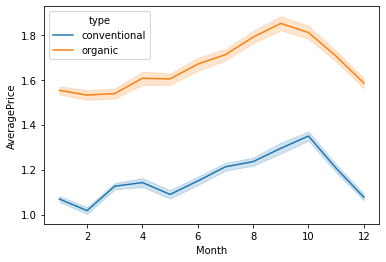

In [20]:
sns.lineplot(x='Month', y='AveragePrice', hue='type',data=dataset)
#plt.show()


Average price of different type

<AxesSubplot:xlabel='type'>

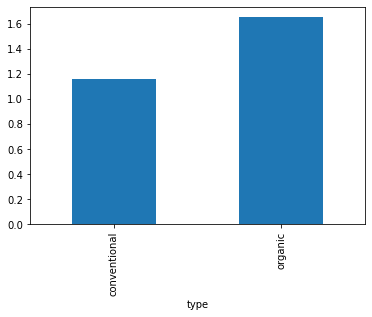

In [21]:
dataset.groupby([dataset['type']])['AveragePrice'].mean().plot.bar()

## Drop the 'region' column, convert the type into integer

In [22]:
dataset.drop('region', axis=1, inplace=True)
dataset['type'].nunique()
dataset_2bp = pd.get_dummies(dataset)
dataset_2bp.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,Month,Day,type_conventional,type_organic
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,2015,12,27,1,0
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,2015,12,20,1,0
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,2015,12,13,1,0
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,2015,12,6,1,0
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,2015,11,29,1,0


# RVM

In [23]:
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

!pip install https://github.com/JamesRitchie/scikit-rvm/archive/master.zip
from skrvm import RVR,RVC

  Using cached https://github.com/JamesRitchie/scikit-rvm/archive/master.zip


In [39]:
X=dataset_2bp.iloc[:,9:13]
y=dataset_2bp['AveragePrice']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
# Standarization
std_trans = StandardScaler()
X_train = std_trans.fit_transform(X_train)
X_test = std_trans.transform(X_test)


In [40]:
X.head()

,year,Month,Day,type_conventional
0,2015,12,27,1
1,2015,12,20,1
2,2015,12,13,1
3,2015,12,6,1
4,2015,11,29,1


In [41]:
rvr = RVR(kernel = 'linear')

rvr.fit(X_train, y_train)
pred_rvr = rvr.predict(X_test)


In [42]:
cv_score = cross_val_score(rvr, X, y, scoring='neg_root_mean_squared_error', cv=5)
cv_score = np.abs(np.mean(cv_score))

print("Model Report for RVM regression")
print('MAE:', metrics.mean_absolute_error(y_test, pred_rvr))
print('MSE:', metrics.mean_squared_error(y_test, pred_rvr))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, pred_rvr)))
print('CV Score:', cv_score)
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % metrics.r2_score(y_test, pred_rvr))

/Users/ray/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/ray/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/ray/opt/anaconda3/lib/python3.8/site-packages/skrvm/rvm.py", line 150, in fit
    self._posterior()
  File "/Users/ray/opt/anaconda3/lib/python3.8/site-packages/skrvm/rvm.py", line 196, in _posterior
    self.sigma_ = np.linalg.inv(i_s)
  File "<__array_function__ internals>", line 5, in inv
  File "/Users/ray/opt/anaconda3/lib/python3.8/site-packages/numpy/linalg/linalg.py", line 545, in inv
    ainv = _umath_linalg.inv(a, signature=signature, extobj=extobj)
  File "/Users/ray/opt/anaconda3/lib/python3.8/site-packages/numpy/linalg/linal

Model Report for RVM regression
MAE: 0.23749017910185177
MSE: 0.09382591670828941
RMSE: 0.3063101642262127
CV Score: nan
Coefficient of determination: 0.42


/Users/ray/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/ray/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/ray/opt/anaconda3/lib/python3.8/site-packages/skrvm/rvm.py", line 150, in fit
    self._posterior()
  File "/Users/ray/opt/anaconda3/lib/python3.8/site-packages/skrvm/rvm.py", line 196, in _posterior
    self.sigma_ = np.linalg.inv(i_s)
  File "<__array_function__ internals>", line 5, in inv
  File "/Users/ray/opt/anaconda3/lib/python3.8/site-packages/numpy/linalg/linalg.py", line 545, in inv
    ainv = _umath_linalg.inv(a, signature=signature, extobj=extobj)
  File "/Users/ray/opt/anaconda3/lib/python3.8/site-packages/numpy/linalg/linal